# Introduction

Financial sector companies typically deal with a wide range and large volume of data, which often comes in various formats and enters the system through physical documents. Thanks to the advancements in optical character recognition (OCR) technology, we can now extract this information and convert it into a digital format. However, due to the diverse nature of the documents, such as different claim forms, payslips, and bank statements, we need to convert the extracted information into a structured format before we can effectively utilize it.

In this demonstration, I will showcase how document understanding techniques can be employed to analyze the various types of documents commonly found in the financial sector.

This method presents a significant opportunity for corporations to leverage and uncover valuable information hidden within unstructured paper documents.

#### source: https://huggingface.co/spaces/PaddlePaddle/UIE-X

# 📄 Multi-mode Document Information Extraction Using UIE-X

**UIE-X** , a multi-modal, multi-task and multilingual Open-domain Information Extraction model is open sourced by [PaddleNLP](https://github.com/PaddlePaddle/PaddleNLP).

**Out-of-the-box Performance**

`paddlenlp.Taskflow` provides general information extraction of text and documents, evaluation opinion extraction and other capabilities, and can extract various types of information, including but not limited to named entity recognition (such as person name, place name, organization name, etc.), Relationships (such as the director of the movie, the release time of the song, etc.), events (such as a car accident at a certain intersection, an earthquake in a certain place, etc.), and information such as evaluation dimensions, opinion words, and emotional tendencies. 

You can use natural language to customize the extraction target, and can uniformly extract the corresponding information in the input text or document without training. 


## **1. Environment Setup**

In [1]:
# Install the right version of Paddle according to CUDA version.
print("============GPU Info================")
# GPU Info
!/opt/bin/nvidia-smi

============GPU Info================
Mon Jun  5 06:45:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                   

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Install Paddle
!pip install paddlepaddle-gpu==2.4.1.post112 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html

# Install PaddleNLP
!pip install --upgrade paddlenlp

# Install PaddleOCR
!pip install --upgrade paddleocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.2/383.2 kB 44.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-api-core 2.11.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.0 which is incompatible.
google-cloud-bigquery 3.9.0 requires protobuf!=3.20.0,!=3.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 74.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.7/128.7 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.0/101.0 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 111.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB

In [4]:
import paddle
import paddlenlp
import paddleocr

paddle.utils.run_check()  # Check if Paddle is installed sucessfully

print(paddle.__version__)
print(paddlenlp.__version__)
print(paddleocr.__version__)

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Running verify PaddlePaddle program ... 
PaddlePaddle works well on 1 GPU.
PaddlePaddle works well on 1 GPUs.
PaddlePaddle is installed successfully! Let's start deep learning with PaddlePaddle now.
2.4.1
2.5.2.post
2.6.1.3


## **2. Quick Start**

### Named Entity Recognition

#### Example 1 Insurance certificate

In [5]:
from pprint import pprint
from paddlenlp import Taskflow
schema = ["Policy number", "the insured", "client id"]
ie_en = Taskflow(
    "information_extraction",
    model="uie-x-base",
    task_path="PaddlePaddle/uie-x-base",
    from_hf_hub=True,
    schema=schema,
    ocr_lang="en",
    schema_lang="en")  # For English text
doc_path = "/content/drive/MyDrive/UIE_X_demo_samples/policy_sample.PNG"
res = ie_en({"doc": doc_path})
pprint(res)

[2023-06-05 06:48:35,450] [    INFO] - loading configuration file /root/.paddlenlp/models/models--PaddlePaddle--uie-x-base/snapshots/02e0c4886433e8121ab598ccf23acacc87eabd25/config.json
[2023-06-05 06:48:35,456] [    INFO] - Model config ErnieLayoutConfig {
  "architectures": [
    "UIEX"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "coordinate_size": 128,
  "enable_recompute": false,
  "eos_token_id": 2,
  "fuse": false,
  "gradient_checkpointing": false,
  "has_relative_attention_bias": true,
  "has_spatial_attention_bias": true,
  "has_visual_segment_embedding": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "image_feature_pool_shape": [
    7,
    7,
    256
  ],
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_2d_position_embeddings": 1024,
  "max_position_embeddings": 514,
  "max_rel_2d_pos": 256,
  "max_rel_pos": 128,
  "model_type": "ernie_layout",
  "num_attention_heads": 12,

[2023-06-05 06:50:39,878] [    INFO] - All model checkpoint weights were used when initializing UIEX.

[2023-06-05 06:50:39,879] [    INFO] - All the weights of UIEX were initialized from the model checkpoint at PaddlePaddle/uie-x-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use UIEX for predictions without further training.
[2023-06-05 06:50:39,889] [    INFO] - Converting to the inference model cost a little time.
[2023-06-05 06:50:39,953] [ WARNING] - Accessing `__annotations__` through `model.__annotations__` will be deprecated after v2.6.0. Instead, do `model.config.__annotations__`
[2023-06-05 06:51:11,824] [    INFO] - The inference model save in the path:/root/.paddlenlp/taskflow/information_extraction/uie-x-base/static/inference


[2023-06-05 06:51:17,885] [    INFO] - We are using <class 'paddlenlp.transformers.ernie_layout.tokenizer.ErnieLayoutTokenizer'> to load 'PaddlePaddle/uie-x-base'.


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:00<00:00, 4.97MiB/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer/en_PP-OCRv3_rec_infer.tar


100%|██████████| 9.96M/9.96M [00:06<00:00, 1.58MiB/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:00<00:00, 3.12MiB/s]


[{'Policy number': [{'bbox': [[241, 192, 352, 207]],
                     'end': 236,
                     'probability': 0.9983883709203027,
                     'start': 222,
                     'text': 'HO-LPI-6102616'}],
  'client id': [{'bbox': [[612, 56, 658, 78]],
                 'end': 65,
                 'probability': 0.9981714791072562,
                 'start': 60,
                 'text': '84275'}],
  'the insured': [{'bbox': [[242, 231, 480, 246]],
                   'end': 281,
                   'probability': 0.9989379296478695,
                   'start': 247,
                   'text': 'Katalyst Office Management Limited'}]}]


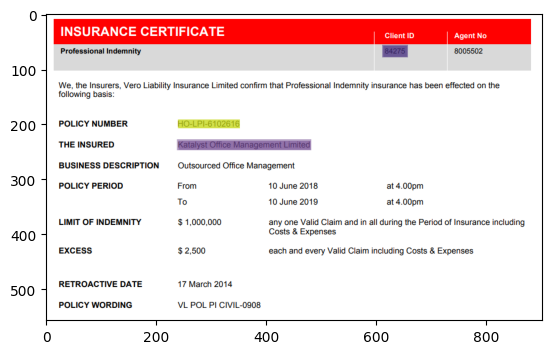

In [6]:
# Visualization
from paddlenlp.utils.doc_parser import DocParser
from PIL import Image
import matplotlib.pyplot as plt

img_path = "/content/drive/MyDrive/UIE_X_demo_samples/policy_sample.PNG"
DocParser.write_image_with_results(
        doc_path,
        result=res[0],
        save_path=img_path)
img=Image.open(img_path )
plt.imshow(img)

#### Example 2: Claim form

In [7]:
from pprint import pprint
from paddlenlp import Taskflow
schema = ["Boat type", 'name of boat','location']
ie_en = Taskflow(
    "information_extraction",
    model="uie-x-base",
    task_path="PaddlePaddle/uie-x-base",
    from_hf_hub=True,
    schema=schema,
    ocr_lang="en",
    schema_lang="en")  # For English text
doc_path = "/content/drive/MyDrive/UIE_X_demo_samples/claim_form.PNG"
res = ie_en({"doc": doc_path})
pprint(res)

[2023-06-05 06:51:52,491] [    INFO] - We are using <class 'paddlenlp.transformers.ernie_layout.tokenizer.ErnieLayoutTokenizer'> to load 'PaddlePaddle/uie-x-base'.


[{'Boat type': [{'bbox': [[528, 58, 618, 75]],
                 'end': 61,
                 'probability': 0.9716272803553316,
                 'start': 47,
                 'text': 'fishing vessel'}],
  'location': [{'bbox': [[260, 125, 322, 139]],
                'end': 153,
                'probability': 0.9761366586082119,
                'start': 145,
                'text': 'Auckland'}],
  'name of boat': [{'bbox': [[138, 60, 194, 74]],
                    'end': 38,
                    'probability': 0.9938987928739849,
                    'start': 31,
                    'text': 'surewin'}]}]


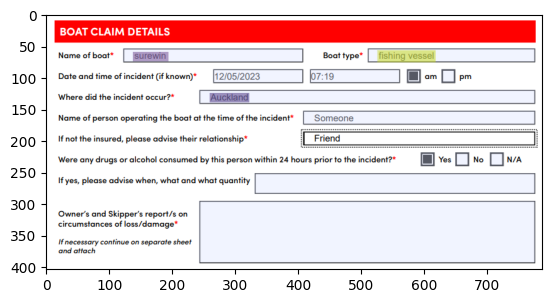

In [8]:
# Visualization
from paddlenlp.utils.doc_parser import DocParser
from PIL import Image
import matplotlib.pyplot as plt


img_path = "/content/drive/MyDrive/UIE_X_demo_samples/claim_form.PNG"
DocParser.write_image_with_results(
        doc_path,
        result=res[0],
        save_path=img_path)
img=Image.open(img_path )
plt.imshow(img)

#### Example 3: ID card

In [9]:
from pprint import pprint
from paddlenlp import Taskflow
schema = ["Date of Birth", 'EXP', 'Name']
ie_en = Taskflow(
    "information_extraction",
    model="uie-x-base",
    task_path="PaddlePaddle/uie-x-base",
    from_hf_hub=True,
    schema=schema,
    ocr_lang="en",
    schema_lang="en")  # For English text
doc_path = "/content/drive/MyDrive/UIE_X_demo_samples/ID.png"
res = ie_en({"doc": doc_path})
pprint(res)

[2023-06-05 06:52:15,340] [    INFO] - We are using <class 'paddlenlp.transformers.ernie_layout.tokenizer.ErnieLayoutTokenizer'> to load 'PaddlePaddle/uie-x-base'.


[{'Date of Birth': [{'bbox': [[328, 116, 471, 136]],
                     'end': 91,
                     'probability': 0.9892180191309023,
                     'start': 81,
                     'text': '08/04/1975'}],
  'EXP': [{'bbox': [[327, 147, 472, 167]],
           'end': 106,
           'probability': 0.8872986758880188,
           'start': 96,
           'text': '08/05/2023'}],
  'Name': [{'bbox': [[270, 198, 410, 217]],
            'end': 138,
            'probability': 0.9460806663531045,
            'start': 129,
            'text': 'JANICEANN'}]}]


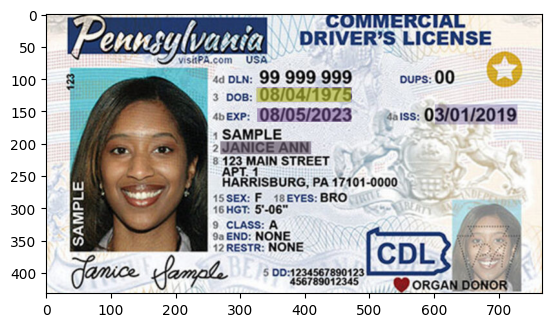

In [10]:
# Visualization
from paddlenlp.utils.doc_parser import DocParser
from PIL import Image
import matplotlib.pyplot as plt

img_path = "/content/drive/MyDrive/UIE_X_demo_samples/ID.png"
DocParser.write_image_with_results(
        doc_path,
        result=res[0],
        save_path=img_path)
img=Image.open(img_path )
plt.imshow(img)

 Using **PP-Structure layout analysis** function

The text recognized in OCR will be sorted from top left to bottom right. For cases such as column division and multiple lines of text in the table, Using the layout analysis function layout_analysis=True to optimize text sorting and enhance the extraction effect. 

### Multi-task extraction

Extract entities and relations simutaneously in the same model

Example 4: Invoice

[{'Customer No.': [{'bbox': [[359, 61, 367, 72]],
                    'end': 50,
                    'probability': 0.930036747996418,
                    'start': 49,
                    'text': '9'}],
  'Date': [{'bbox': [[327, 45, 366, 60]],
            'end': 34,
            'probability': 0.9983013071731861,
            'start': 25,
            'text': '7/09/2020'}],
  'No.': [{'bbox': [[360, 35, 365, 42]],
           'end': 21,
           'probability': 0.445615029907831,
           'start': 20,
           'text': '7'}],
  'Total GBP': [{'bbox': [[340, 178, 366, 190]],
                 'end': 210,
                 'probability': 0.5194225755109017,
                 'start': 204,
                 'text': '792,00'}]}]


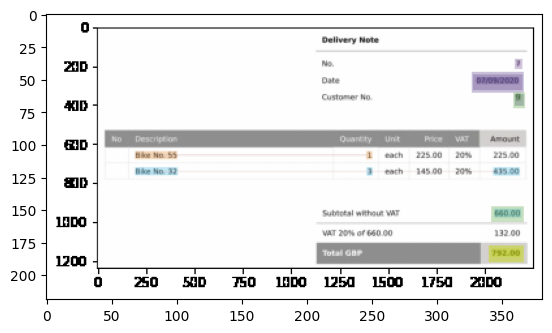

In [11]:
# For English text
schema = ["Total GBP", "No.", "Date", "Customer No.", "Subtotal without VAT", {"Description": ["Quantity", "Amount"]}]
ie_en.set_schema(schema)
doc_path = "/content/drive/MyDrive/UIE_X_demo_samples/invoice.png"
res = ie_en({"doc": doc_path})
pprint(res)

img_path = "/content/drive/MyDrive/UIE_X_demo_samples/invoice.png"
DocParser.write_image_with_results(
        doc_path,
        result=res[0],
        save_path=img_path)
img=Image.open(img_path )
plt.imshow(img)

#### Example 5: Financial Table

[2023-06-05 07:00:52,353] [    INFO] - We are using <class 'paddlenlp.transformers.ernie_layout.tokenizer.ErnieLayoutTokenizer'> to load 'PaddlePaddle/uie-x-base'.


download https://paddleocr.bj.bcebos.com/ppstructure/models/slanet/en_ppstructure_mobile_v2.0_SLANet_infer.tar to /root/.paddleocr/whl/table/en_ppstructure_mobile_v2.0_SLANet_infer/en_ppstructure_mobile_v2.0_SLANet_infer.tar


100%|██████████| 10.2M/10.2M [00:03<00:00, 3.21MiB/s]


download https://paddleocr.bj.bcebos.com/ppstructure/models/layout/picodet_lcnet_x1_0_fgd_layout_infer.tar to /root/.paddleocr/whl/layout/picodet_lcnet_x1_0_fgd_layout_infer/picodet_lcnet_x1_0_fgd_layout_infer.tar


100%|██████████| 10.1M/10.1M [00:06<00:00, 1.63MiB/s]


[{'Date': [{'bbox': [[1004, 179, 1060, 206]],
            'end': 128,
            'probability': 0.7187476668031927,
            'start': 124,
            'text': '2010'},
           {'bbox': [[1129, 177, 1187, 207]],
            'end': 132,
            'probability': 0.6484097405254268,
            'relations': {'Gross profit': [{'bbox': [[1129, 295, 1202, 320]],
                                            'end': 228,
                                            'probability': 0.9811707595943631,
                                            'start': 222,
                                            'text': '43.450'}]},
            'start': 128,
            'text': '2009'},
           {'bbox': [[1251, 179, 1306, 206]],
            'end': 136,
            'probability': 0.6561565596954324,
            'relations': {'Gross profit': [{'bbox': [[1243, 293, 1328, 324]],
                                            'end': 234,
                                            'probability': 0.99566209

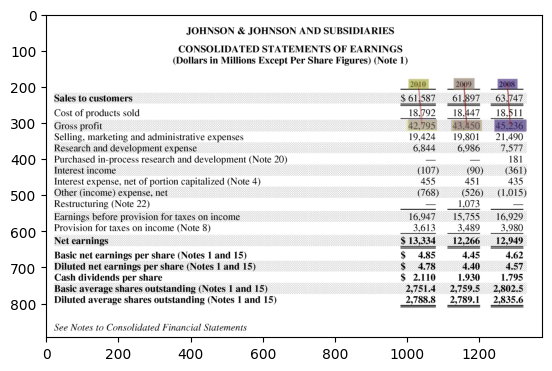

In [12]:
# For English text
schema = [{"Date": ["Gross profit"]}]
ie_en.set_schema(schema)
doc_path = "/content/drive/MyDrive/UIE_X_demo_samples/Earning_table.png"

ie_en = Taskflow(
    "information_extraction",
    model="uie-x-base",
    task_path="PaddlePaddle/uie-x-base",
    from_hf_hub=True,
    schema=schema,
    ocr_lang="en",
    schema_lang="en",
    layout_analysis=True)  # For English text

res = ie_en({"doc": doc_path})


pprint(res)

img_path = "/content/drive/MyDrive/UIE_X_demo_samples/Earning_table.png"
DocParser.write_image_with_results(
        doc_path,
        result=res[0],
        save_path=img_path)
img=Image.open(img_path )
plt.imshow(img)

## **3. Fine-tune**

Refer to [https://github.com/PaddlePaddle/PaddleNLP/blob/develop/applications/information_extraction/README_en.md](https://github.com/PaddlePaddle/PaddleNLP/blob/develop/applications/information_extraction/README_en.md).

## **About UIE**

Information extraction suffers from its varying targets, heterogeneous structures, and demand-specific schemas. The unified text-to-structure generation framework, namely UIE, can universally model different IE tasks, adaptively generate targeted structures, and collaboratively learn general IE abilities from different knowledge sources. Specifically, UIE uniformly encodes different extraction structures via a structured extraction language, adaptively generates target extractions via a schema-based prompt mechanism - structural schema instructor, and captures the common IE abilities via a large-scale pre-trained text-to-structure model. Experiments show that UIE achieved the state-of-the-art performance on 4 IE tasks, 13 datasets, and on all supervised, low-resource, and few-shot settings for a wide range of entity, relation, event and sentiment extraction tasks and their unification. These results verified the effectiveness, universality, and transferability of UIE.

UIE Paper: https://arxiv.org/abs/2203.12277

PaddleNLP released UIE model series for Information Extraction of texts and multi-modal documents which use the ERNIE 3.0 models as the pre-trained language models and were finetuned on a large amount of information extraction data.

- **Experimental results on text dataset**

We conducted experiments on the in-house test sets of the three different domains of Internet, medical care, and finance:

<img src="https://user-images.githubusercontent.com/11793384/209778847-0e1ad84f-bedf-4718-9658-b739ee3af3d2.png" width="80%" height="80%"> <br />

0-shot means that no training data is directly used for prediction through paddlenlp.Taskflow, and 5-shot means that each category contains 5 pieces of labeled data for model fine-tuning. Experiments show that UIE can further improve the performance with a small amount of data (few-shot).

- **Experimental results on multimodal datasets**

We experimented on the zero-shot performance of UIE-X on the in-house multi-modal test sets in three different domains of general, financial, and medical:

<img src="https://user-images.githubusercontent.com/11793384/209779012-f3d53063-8b26-4c09-8ced-47ca75c77dc9.png" width="70%" height="70%"> <br />

The general test set contains complex samples from different fields and is the most difficult task.

> Detailed Info: https://github.com/PaddlePaddle/PaddleNLP/tree/develop/applications/information_extraction

